Working from Git repository b'heads/master-0-gb978a99\n'


/Users/timcornwell/Code/low-calibration/telionoNonKol.py:27: RuntimeWarning: invalid value encountered in double_scalars
  gamma( (2 * n + 4 + beta) / 2)) * numpy.power(B / (r0 * (3.0 / wavelength)), beta))
/Users/timcornwell/env/lib/python3.5/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


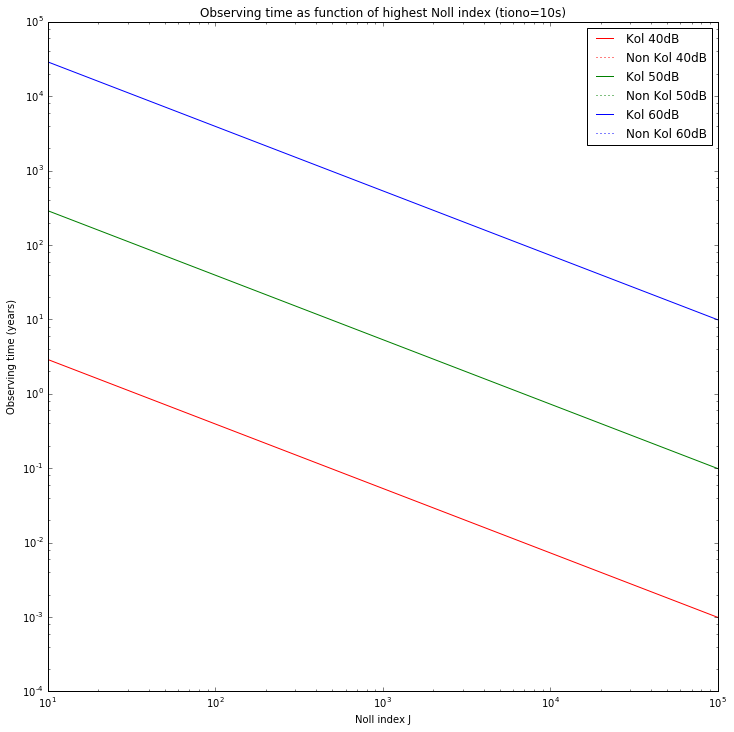

In [1]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)
#pylab.rcParams['image.cmap'] = 'rainbow' 

from telutil import *

import teliono as tk
import telionoNonKol as tnk


import subprocess
print ("Working from Git repository %s" % subprocess.check_output(["git",  "describe", "--long", "--all"]))

plt.clf()

ti=tk.TelIono()

tink=tnk.TelIono()


B=25.7
nstations=1

J=numpy.arange(10 ,100000, 10)

tsky=numpy.zeros([len(J)])
tskynk=numpy.zeros([len(J)])

for i in range(len(J)):
    tsky[i]=ti.tsky(J[i],DR=1e4,B=B)/(365.0*24.0*3600.0)
    tskynk[i]=tink.tsky(J[i],DR=1e4,B=B)/(365.0*24.0*3600.0)

plt.loglog(J,tsky, color='r', label='Kol 40dB')
plt.loglog(J,tskynk, color='r', linestyle='dotted', label='Non Kol 40dB')

for i in range(len(J)):
    tsky[i]=ti.tsky(J[i],DR=1e5,B=B)/(365.0*24.0*3600.0)
    tskynk[i]=tink.tsky(J[i],DR=1e5,B=B)/(365.0*24.0*3600.0)


plt.loglog(J,tsky, color='g', label='Kol 50dB')
plt.loglog(J,tskynk, color='g', linestyle='dotted', label='Non Kol 50dB')

for i in range(len(J)):
    tsky[i]=ti.tsky(J[i],DR=1e6,B=B)/(365.0*24.0*3600.0)
    tskynk[i]=tink.tsky(J[i],DR=1e6,B=B)/(365.0*24.0*3600.0)


plt.loglog(J,tsky, color='b', label='Kol 60dB')
plt.loglog(J,tskynk, color='b', linestyle='dotted', label='Non Kol 60dB')

plt.xlabel('Noll index J')
plt.ylabel('Observing time (years)')
plt.title('Observing time as function of highest Noll index (tiono=10s)')

plt.legend()

plt.show()

plt.savefig('dr.pdf')

#plt.close('all')